In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from final_project import find_contours
from final_project import find_head

## Implementing Different Thresholding

Text(0.5, 1.0, "Thresholding using Otsu's Binarization")

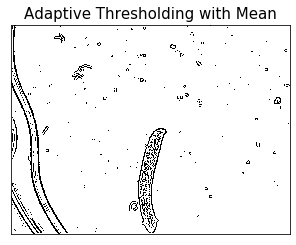

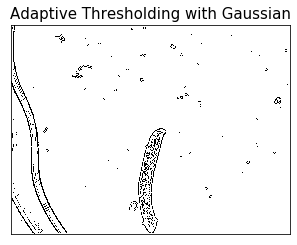

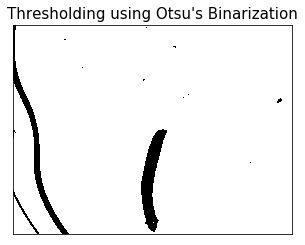

In [2]:
## Loading image and applying blur
img = cv.imread('../final-project/planaria/W13-PT-D11.TIF')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img,(5,5),0)


## Using Mean-C in adaptive thresholding
adaptive_thresh_mean = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
plt.figure(figsize=(5,5))
plt.imshow(adaptive_thresh_mean,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('Adaptive Thresholding with Mean', fontsize=15)


## Using Gaussian-C in adaptive thresholding
adaptive_thresh_gauss = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
plt.figure(figsize=(5,5))
plt.imshow(adaptive_thresh_gauss,cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.title('Adaptive Thresholding with Gaussian', fontsize=15)

## Using Otsu's binarization for thresholding
_,thresh_otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.figure(figsize=(5,5))
plt.imshow(thresh_otsu,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Thresholding using Otsu's Binarization", fontsize=15)



## Thresholding and Finding Contours of All Images in Dataset

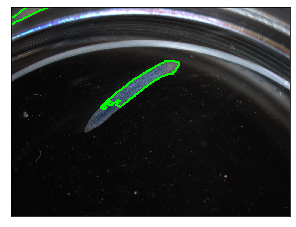

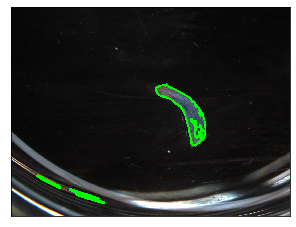

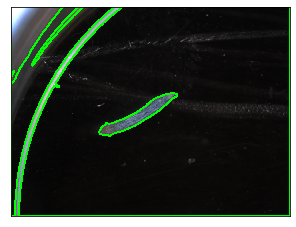

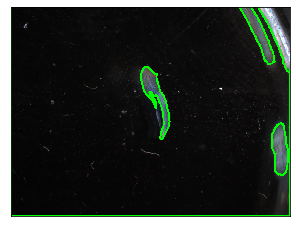

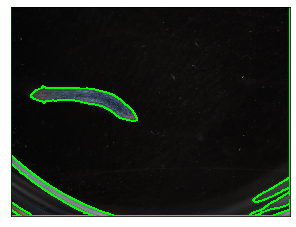

In [33]:
allNums = [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,
      20,21,23,24,25,26,27,28,29,20,31,32,33,34,35,
      36,37,38,39,40,42,43,44,45,46,47,48,49,50,51,
      52,53,54]

for i in range(5):
    img = cv.imread('../final-project/planaria/W' + str(allNums[i]) + '-PT-D11.TIF') # load each picture
    contours = find_contours(img)      # find all contours of image
    drawn = cv.drawContours(img, contours, -1, (0,255,0), 10) # draw all the contours
    plt.figure(figsize=(5,5))
    plt.imshow(drawn,cmap='gray')
    plt.xticks([]), plt.yticks([])


## Head of Planaria Detection

********** Distances between max and min X and max and min Y **********


X distance: 474
Y distance: 113
Orientation of planaria: horizontal


********** Distances between max and min X and max and min Y **********


X distance: 181
Y distance: 524
Orientation of planaria: vertical




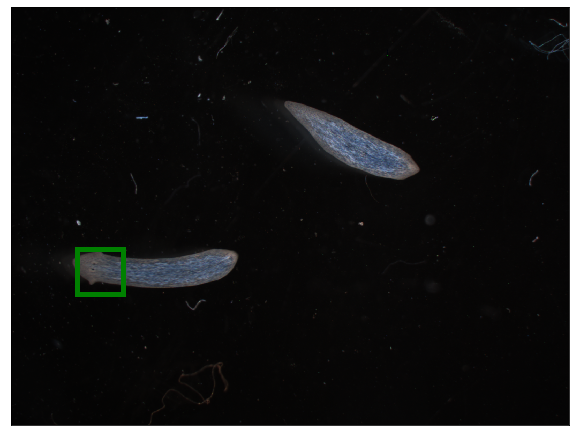

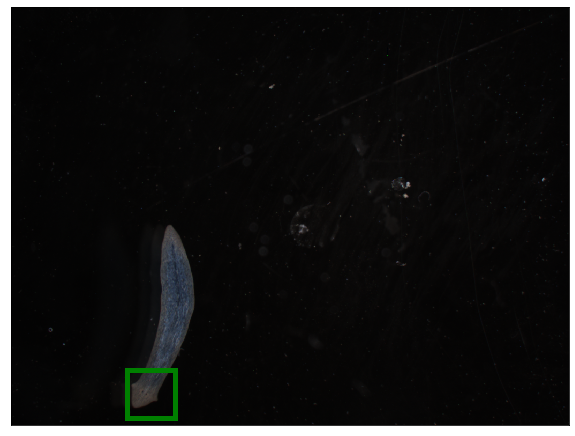

In [8]:
imgs_that_work_well = [33,50,12,5,32,27,16,15,13,12,11,9,54,53,52,48,39,24,23,17]
right_contours = [0,0,3,3,1,0,0,2,3,3,1,0,0,2,1,1,1,2,3,4]

for i in range(2):
    img = cv.imread('../final-project/planaria/W' + str(imgs_that_work_well[i]) +'-PT-D11.TIF')
    all_contours = find_contours(img)
    contour_of_planaria = all_contours[right_contours[i]]
    rect_of_head = find_head(contour_of_planaria)

    #drawn = cv.drawContours(img, all_contours, -1, (0,255,0), 10)
    fig,ax = plt.subplots(1, figsize=(10,10))
    ax.imshow(img,cmap='gray')
    ax.add_patch(rect_of_head)  
    plt.xticks([]), plt.yticks([])


## Fourier Descriptors

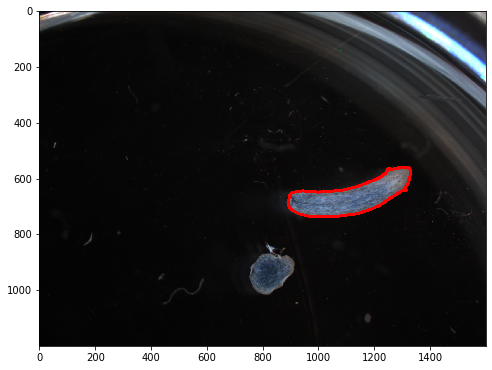

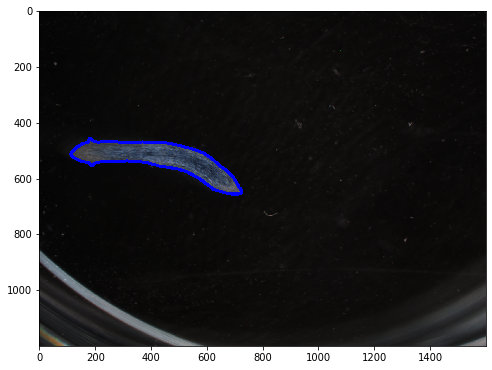

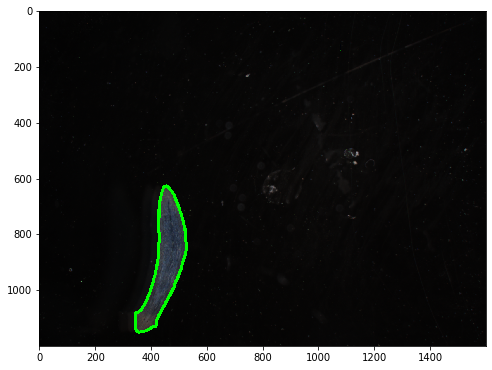

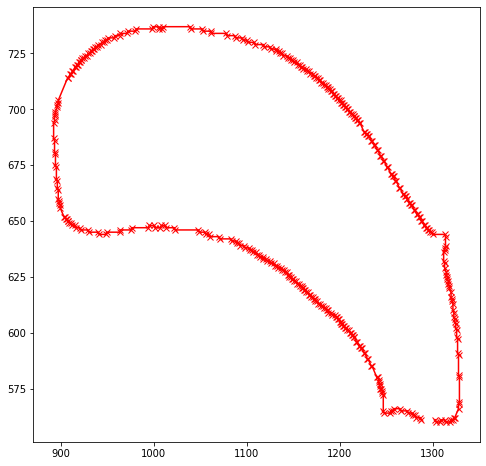

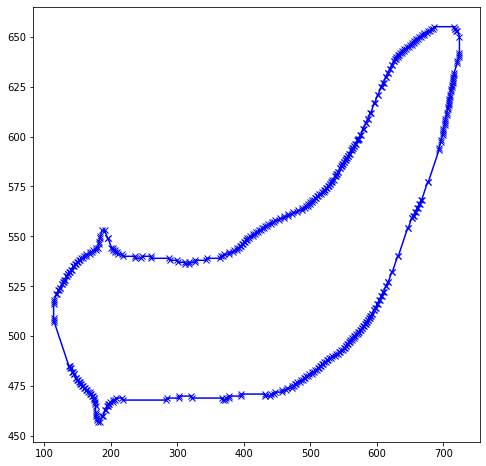

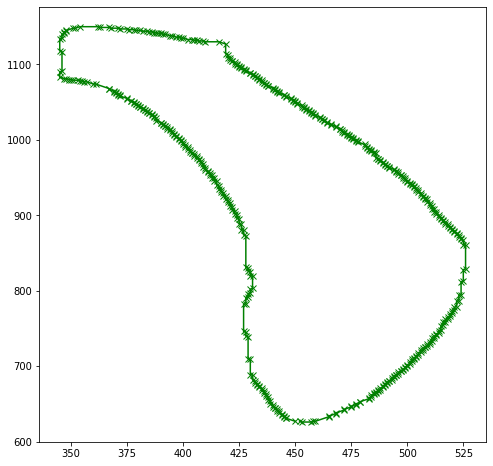

In [34]:
img_1 = cv.imread('../final-project/planaria/W12-PT-D11.TIF')
img_2 = cv.imread('../final-project/planaria/W5-PT-D11.TIF')
img_3 = cv.imread('../final-project/planaria/W50-PT-D11.TIF')

contours_1 = find_contours(img_1)
contours_2 = find_contours(img_2)
contours_3 = find_contours(img_3)



drawn = cv.drawContours(img_1, contours_1, 3, (255,0,0), 10)
fig,ax = plt.subplots(1, figsize=(8,8))
ax.imshow(drawn,cmap='gray')


drawn = cv.drawContours(img_2, contours_2, 3, (0,0,255), 10)
fig,ax = plt.subplots(1, figsize=(8,8))
ax.imshow(drawn,cmap='gray')

drawn = cv.drawContours(img_3, contours_3, 0, (0,255,0), 10)
fig,ax = plt.subplots(1, figsize=(8,8))
ax.imshow(drawn,cmap='gray')


xs_1 = [pt[0][0] for pt in contours_1[3]]
ys_1 = [pt[0][1] for pt in contours_1[3]]

xs_2 = [pt[0][0] for pt in contours_2[3]]
ys_2 = [pt[0][1] for pt in contours_2[3]]

xs_3 = [pt[0][0] for pt in contours_3[0]]
ys_3 = [pt[0][1] for pt in contours_3[0]]

contour_complex_1 = np.empty(len(xs_1), dtype=complex)
contour_complex_2 = np.empty(len(xs_2), dtype=complex)
contour_complex_3 = np.empty(len(xs_3), dtype=complex)


#the x coordinates of the points on the contour
contour_complex_1.real= xs_1
contour_complex_2.real= xs_2
contour_complex_3.real= xs_3


# the y coordinates of the points on the contour
contour_complex_1.imag= ys_1
contour_complex_2.imag= ys_2
contour_complex_3.imag= ys_3


# plot of the contour
plt.figure(figsize=(8,8))
plt.plot(contour_complex_1.real,contour_complex_1.imag,'rx-')

plt.figure(figsize=(8,8))
plt.plot(contour_complex_2.real,contour_complex_2.imag,'bx-')

plt.figure(figsize=(8,8))
plt.plot(contour_complex_3.real,contour_complex_3.imag,'gx-')

In [12]:
fourier_result_1 = np.fft.fft(contour_complex_1)
fourier_result_2 = np.fft.fft(contour_complex_2)
fourier_result_3 = np.fft.fft(contour_complex_3)

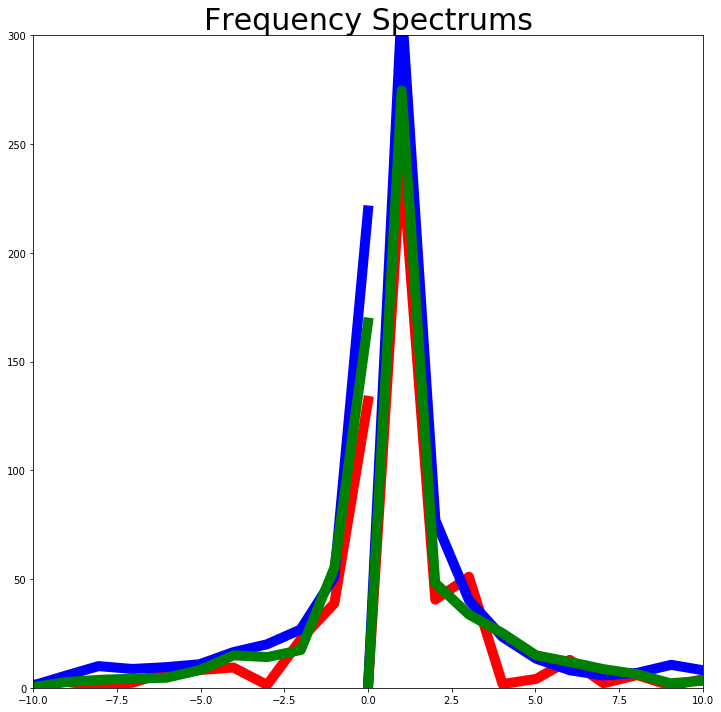

In [38]:
N_1 = len(contour_complex_1)
N_2 = len(contour_complex_2)
N_3 = len(contour_complex_3)

T_1 = 1/N_1
T_2 = 1/N_2
T_3 = 1/N_3

xf_1 = np.linspace(0.0, 1.0/(2.0*T_1), N_1//2)
xf2_1 = np.linspace(0.0, -1.0/(2.0*T_1), (N_1//2))
xf2_1=xf2_1[:-1]

xf_2 = np.linspace(0.0, 1.0/(2.0*T_2), N_2//2)
xf2_2 = np.linspace(0.0, -1.0/(2.0*T_2), (N_2//2))
#xf2_2=xf2_2[:-1]

xf_3 = np.linspace(0.0, 1.0/(2.0*T_3), N_3//2)
xf2_3 = np.linspace(0.0, -1.0/(2.0*T_3), (N_3//2))
xf2_3=xf2_3[:-1]



backhalf_1 = fourier_result_1[(N_1//2)+1:]
backhalf_1 = backhalf_1[::-1]
plt.figure(figsize=(12,12))
plt.plot(xf_1, 2.0/N_1 * np.abs(fourier_result_1[0:N_1//2]), 'r',linewidth=10)
plt.plot(xf2_1, 2.0/N_1 * np.abs(backhalf_1), 'r', linewidth=10)
#plt.axis([-20,20,0,500])


backhalf_2 = fourier_result_2[(N_2//2)+1:]
backhalf_2 = backhalf_2[::-1]
#plt.figure(figsize=(12,12))
plt.plot(xf_2, 2.0/N_2 * np.abs(fourier_result_2[0:N_2//2]), 'b-', linewidth=10)
plt.plot(xf2_2, 2.0/N_2 * np.abs(backhalf_2), 'b-', linewidth=10)
#plt.axis([-20,20,0,500])


backhalf_3 = fourier_result_3[(N_3//2)+1:]
backhalf_3 = backhalf_3[::-1]
#plt.figure(figsize=(12,12))
plt.plot(xf_3, 2.0/N_3 * np.abs(fourier_result_3[0:N_3//2]), 'g', linewidth=10)
plt.plot(xf2_3, 2.0/N_3 * np.abs(backhalf_3), 'g', linewidth=10)
plt.axis([-10,10,0,300])
#plt.legend(['A','A-','B','B-', 'C', 'C-'], fontsize=30)

plt.title('Frequency Spectrums', fontsize=30)
plt.show()



## Centering Contours

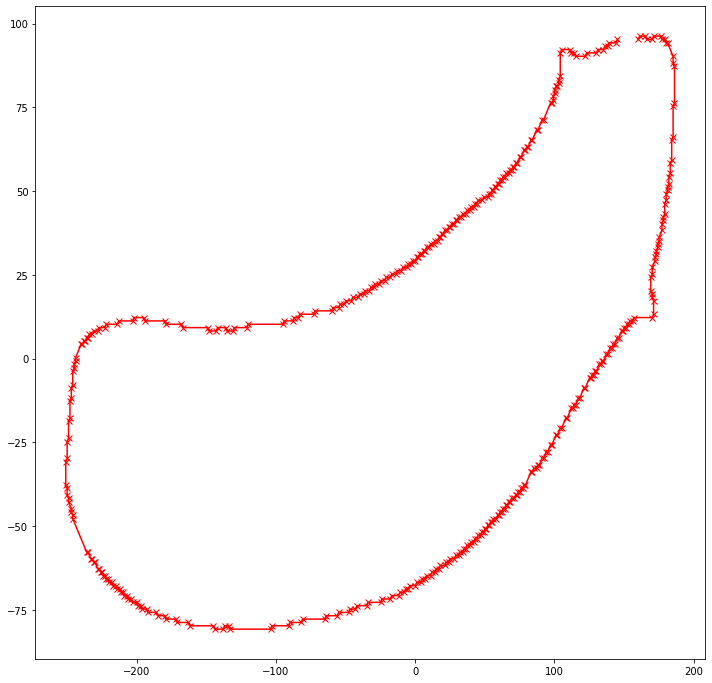

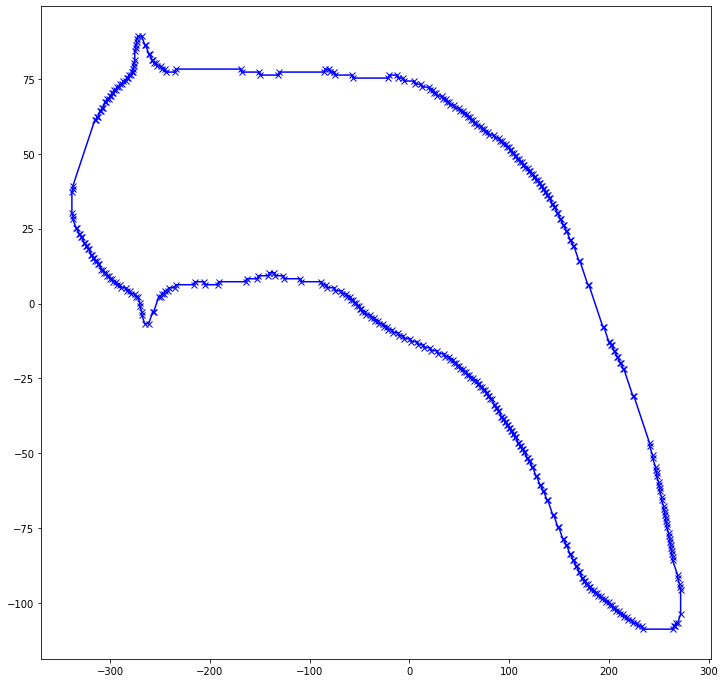

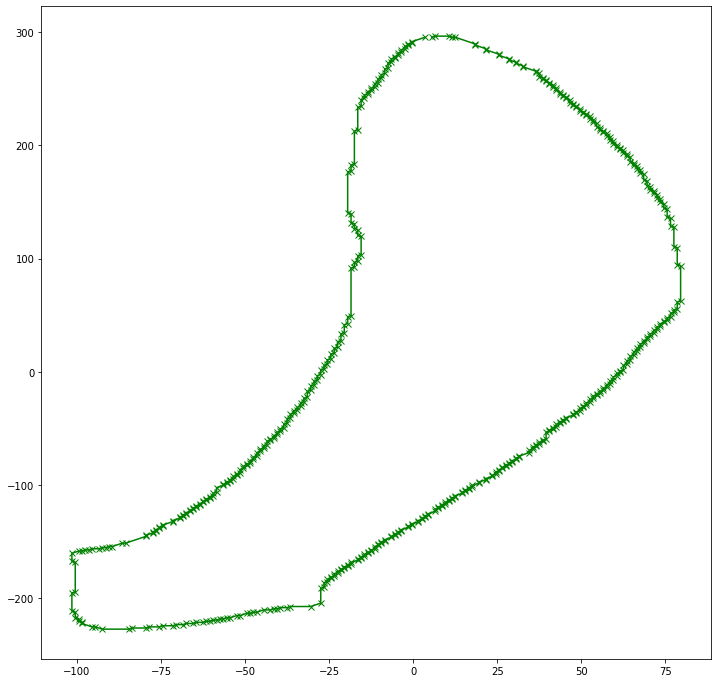

In [36]:
fourier_result_1[0] = 0
x = [fourier_result_3[i] for i in range(len(fourier_result_1))]
plt.figure(figsize=(12,12))
new_contour_1 = np.fft.ifft(fourier_result_1)
plt.plot(new_contour_1.real,-1*new_contour_1.imag,'rx-')
#plt.axis([-100, 100, -400, 400])
plt.show()


fourier_result_2[0] = 0
#print(fourier_result)
plt.figure(figsize=(12,12))
new_contour_2 = np.fft.ifft(fourier_result_2)
plt.plot(new_contour_2.real,-1*new_contour_2.imag,'bx-')
#plt.axis([-100, 100, -400, 400])
plt.show()


fourier_result_3[0] = 0
#print(fourier_result)
plt.figure(figsize=(12,12))
new_contour_3 = np.fft.ifft(fourier_result_3)
plt.plot(new_contour_3.real,-1*new_contour_3.imag,'gx-')
#plt.axis([-100, 100, -400, 400])

plt.show()



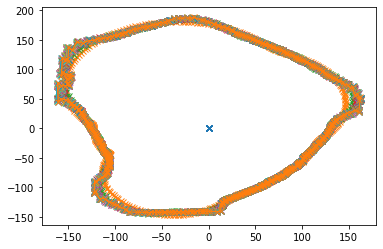

In [37]:
for cutoff in range(0,N_1//2,10):
    fourier_result2 = fourier_result_3.copy()
    fourier_result2[cutoff:N_1//2] = 0+0j
    fourier_result2[(N_1//2)+cutoff:] = 0+0j
    new_contour2 = np.fft.ifft(fourier_result2)
    plt.plot(new_contour2.real,-1*new_contour2.imag,'x-')
plt.show()